# Домашнее задание к семинару 02 (HW02)
## Тема: работа с табличными данными в Pandas, контроль качества данных, базовый EDA и визуализация в Matplotlib

**Содержание:**
- Загрузка данных и первичный осмотр
- Пропуски, дубликаты и базовый контроль качества
- Базовый EDA: группировки, агрегаты, частоты
- Визуализация данных в Matplotlib

---

### Загрузка данных и первичный осмотр

In [1]:
# импортируем библиотеку для работы с датасетом
import pandas as pd

# поскольку датасет находится в одной директории с ноутбуком,
# нет нужды использовать pathlib при его импорте
df = pd.read_csv("S02-hw-dataset.csv", sep=',')

Проведём первичный осмотр данных

In [2]:
print(f"Размерность датасета: {df.shape}")
print(f"Колчество элементов: {df.size}")
print(f"Индексы: {df.index}")
print(f"Колонки: {df.columns} \n")

print("Информация о пропусках и типах данных признаков:\n")
print(df.info())

Размерность датасета: (41, 5)
Колчество элементов: 205
Индексы: RangeIndex(start=0, stop=41, step=1)
Колонки: Index(['user_id', 'age', 'country', 'purchases', 'revenue'], dtype='object') 

Информация о пропусках и типах данных признаков:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None


In [3]:
print(f"Базовые описательные статистики признаков:")
df.describe()

Базовые описательные статистики признаков:


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [4]:
print(f"Первые 7 строк: \n {df.head(7)} \n")
print(f"Первые 7 строк в виде Numpy массива: \n {df.head(7).values} \n")
print(f"Последние 9 строк: \n {df.tail(9)} \n")

Первые 7 строк: 
    user_id    age country  purchases  revenue
0        1   25.0      FR          7      749
1        2   24.0      RU          5     1115
2        3   52.0      FR          7      399
3        4   31.0      RU          6      654
4        5    NaN      DE          6     1296
5        6  120.0      FR         -1      785
6        7   46.0      RU          0        0 

Первые 7 строк в виде Numpy массива: 
 [[1 25.0 'FR' 7 749]
 [2 24.0 'RU' 5 1115]
 [3 52.0 'FR' 7 399]
 [4 31.0 'RU' 6 654]
 [5 nan 'DE' 6 1296]
 [6 120.0 'FR' -1 785]
 [7 46.0 'RU' 0 0]] 

Последние 9 строк: 
     user_id   age country  purchases  revenue
32       33  23.0      US          5      445
33       34  28.0      FR          0        0
34       35  45.0      FR          2      404
35       36  51.0      US          3      342
36       37  18.0      DE          4     1104
37       38  35.0      DE          3      738
38       39  39.0      FR          7     1162
39       40  34.0      RU        

---

### Пропуски, дубликаты и базовый контроль качества
Проверим данные на наличие пропусков (проверка полноты данных)

In [5]:
print(f"Доля пропусков среди признаков (как среднее): \n {df.isna().mean()} \n")
print(f"Доля пропусков среди признаков (как общее кол-во - кол-во не пропущенных): \n {(df.shape[0] - df.count()) / df.shape[0]} \n")
print(f"Доля пропусков среди признаков (процентная): \n {(df.isna().sum() / df.shape[0] * 100).round(2)} \n")

Доля пропусков среди признаков (как среднее): 
 user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64 

Доля пропусков среди признаков (как общее кол-во - кол-во не пропущенных): 
 user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64 

Доля пропусков среди признаков (процентная): 
 user_id      0.00
age          4.88
country      0.00
purchases    0.00
revenue      0.00
dtype: float64 



Проверим датасет на наличие дубликатов (проверка уникальности данных)

In [6]:
print(f"Всего дубликатов: {df.duplicated().sum()} \nДубликаты:")
df[df.duplicated()]

Всего дубликатов: 1 
Дубликаты:


,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [7]:
# проверка пользователей с одинаковым user_id
df[df.user_id.duplicated()]

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


Проверим данные на валидность

In [8]:
# отрицательные либо экстремальные значения возраста
df[(df.age < 0) | (df.age > 110)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [9]:
# несовершеннолетние пользователи
df[df.age < 18]

,user_id,age,country,purchases,revenue
20,21,5.0,RU,8,1488


In [10]:
# пользователи с отрицательным числом заказов
# заметим, что значение 0 не учитывается, так как пользователь мог успеть только зарегистрироваться 
# в системе, ещё не совершив заказ
df[df.purchases < 0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [11]:
# проверим датасет на существование отрицательной выручки
df[df.revenue < 0]

,user_id,age,country,purchases,revenue


In [12]:
# проверим, что все страны реальны
df.country.unique()

array(['FR', 'RU', 'DE', 'CN', 'US'], dtype=object)

Проверим данные на целостность

In [13]:
# пользователи с нулевой выручкой при наличии заказов
df.query('purchases > 0 and revenue == 0')

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [14]:
# пользователи с НЕ нулевой выручкой при отсутствии заказов
df.query('purchases == 0 and revenue > 0')

,user_id,age,country,purchases,revenue


**Вывод о качестве данных**
В ходе проверки качества данных было выявлено несколько недостатков датасета:

- Наличие 2 пропущенных значений у признака age, что составляет примерно 4.88% от общего кол-ва пользователей
- Наличие дублирующей записи и пользователе с user_id=10 (duplicate_id=40)
- Наличие пользователя (user_id=5) с отрицательным кол-во заказов и нереалистичным значением возраста
- Наличие пользователя (user_id=11) с положительным числом заказов и нулевой выручкой
- Наличие пятилетнего покупателя, что, с большой вероятностью, ошибка

Поскольку доля пропусков в признаке age невелика, их можно интерполировать средним или медианным значением.
Для признака country не было обнаружено пропусков или несуществующих стран.

---

### Базовый EDA: группировки, агрегаты, частоты

In [15]:
# проведём расчёт кол-ва стран (единственный категориальный признак)
print(df.country.value_counts())
print((df.country.value_counts() / df.shape[0] * 100).round(1))

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
country
RU    31.7
FR    29.3
US    19.5
DE    14.6
CN     4.9
Name: count, dtype: float64


In [16]:
# Медианный возраст покупателей в каждой стране
df.groupby("country")["age"].median().sort_values(ascending=False)

country
FR    42.0
US    39.0
DE    35.0
RU    26.0
CN    24.0
Name: age, dtype: float64

In [17]:
# Средняя выручка в каждой стране
df.groupby("country")["revenue"].mean().round().sort_values(ascending=False)

country
DE    1446.0
CN    1054.0
RU     790.0
FR     676.0
US     557.0
Name: revenue, dtype: float64

In [18]:
# возрастной размах среди покупателей разных стран
# не учитываем экстремальное значение возраста и пропуски в этом же признаке
df[df.age <= 110].dropna()\
    .groupby("country")["age"]\
    .agg(lambda arr: arr.max() - arr.min())\
    .sort_values(ascending=False)

country
RU    49.0
FR    35.0
DE    34.0
US    28.0
CN     8.0
Name: age, dtype: float64

In [19]:
# максимальное количество заказов пользователей старше 40 лет по странам 
# не учитываем отрицательное значение покупок 
# пропуски возраста при этом не важны
df[(df.purchases >= 0) & (df.age > 40)]\
    .groupby("country")["purchases"].max()\
    .reindex(df['country'].unique(), fill_value=0)\
    .sort_values(ascending=False)

country
FR    7
RU    6
DE    6
US    4
CN    0
Name: purchases, dtype: int64

Добавим диапазоны значений для возраста и выручки

In [20]:
df["Age Category"] = pd.cut(df.age,
                            bins=[0, 18, 35, 65, 110, df.age.max()],
                            labels=["Underage", "Young Adult", "Middle-aged", "Senior", "Elderly"],
                            include_lowest=False, right=False)
df["Revenue Level"] = pd.cut(df.revenue,
                            bins = [0, 500, 1000, 1500, 2000, 2500],
                            labels = ["Very Low", "Low", "Medium", "High", "Very High"],
                            include_lowest=True) 
df.head()

,user_id,age,country,purchases,revenue,Age Category,Revenue Level
0,1,25.0,FR,7,749,Young Adult,Low
1,2,24.0,RU,5,1115,Young Adult,Medium
2,3,52.0,FR,7,399,Middle-aged,Very Low
3,4,31.0,RU,6,654,Young Adult,Low
4,5,NaN,DE,6,1296,NaN,Medium


In [21]:
# процентная доля пользователей по возрастным категориям и уровню заработка
print("Группировка по возрастной категории: \n", (df["Age Category"]\
                                                    .value_counts().sort_values(ascending=False)
                                                    / df.shape[0] * 100).round(1))
print("\nГруппировка по уровню заработка: \n", (df["Revenue Level"]\
                                                    .value_counts().sort_values(ascending=False)
                                                    / df.shape[0] * 100).round(1))

Группировка по возрастной категории: 
 Age Category
Young Adult    48.8
Middle-aged    41.5
Underage        2.4
Senior          0.0
Elderly         0.0
Name: count, dtype: float64

Группировка по уровню заработка: 
 Revenue Level
Very Low     34.1
Low          34.1
Medium       19.5
Very High     7.3
High          4.9
Name: count, dtype: float64


А также рассмотрим статистические выбросы для revenue, согласно критерию Тьюки

In [22]:
Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['revenue'] < (Q1 - 1.5 * IQR)) | (df['revenue'] > (Q3 + 1.5 * IQR))]

outliers

,user_id,age,country,purchases,revenue,Age Category,Revenue Level
13,14,36.0,DE,9,2358,Middle-aged,Very High
23,24,32.0,DE,11,2475,Young Adult,Very High


**Основные наблюдения** 

В данных доминируют пользователи из России (RU ~ 32%) и Франции (FR ~ 30), при этом наименьшую часть занимает Китай (CN ~ 5%). 
По возрастным категориям преобладают молодые взрослые (18-35 лет), что соответствует медианному возрасту 33 года по всему датасету. 
При этом средняя выручка значительно варьируется между странами - лидерами являются Германия (1446) и Китай (1054), тогда как США показывают достаточно низкий показатель (557).

К неожиданным эффектам можно отнести наличие двух пользователей из Германии с самой высокой прибылью, несмотря на малую долю немцев среди пользователей (~ 15%). К негативным эффектам можно отнести малое кол-во пользователей из Китая (~5% или 2 пользователя).

---
### Визуализация данных в Matplotlib
#### Гистограмма распределения возраста пользователей

In [23]:
# импорт библиотеки для визуализации данных
import matplotlib.pyplot as plt

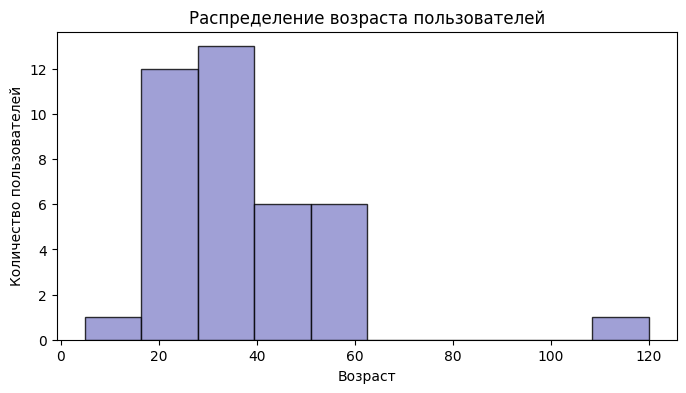

In [24]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(df["age"].dropna(), 
        bins=10, 
        color="#8888CC", 
        edgecolor='black', 
        alpha=0.8)

ax.set_xlabel("Возраст")
ax.set_ylabel("Количество пользователей")
ax.set_title("Распределение возраста пользователей")

plt.savefig('figures/user_ages_hist.png', dpi=300)
plt.show()

График позволяет сделать выводы об основных возрастных категориях покупателей, а таже заметить явное экстремальное значение

### Гистограмма средней и медианной выручки по странам

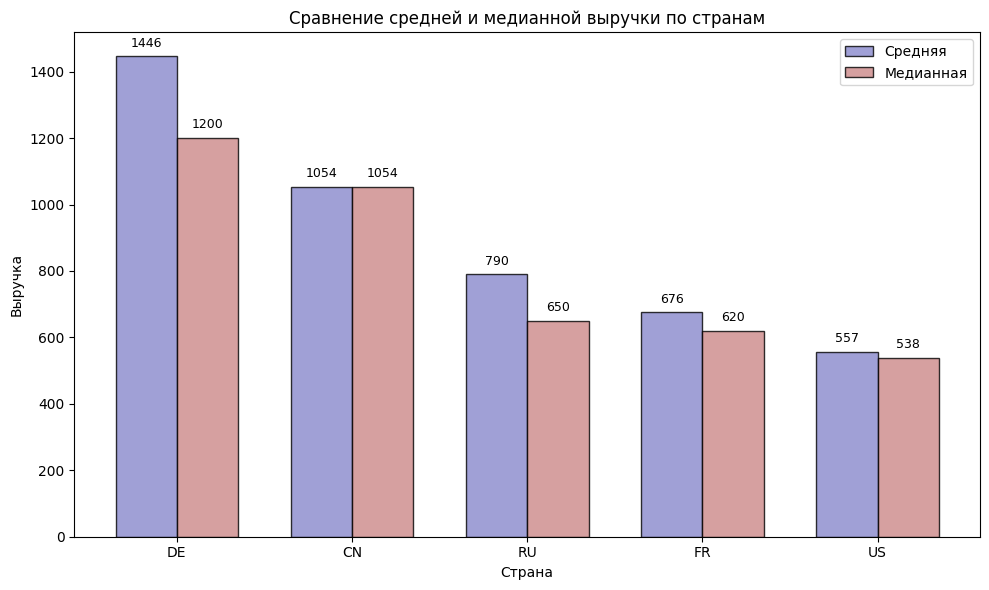

In [25]:
import numpy as np

# данные средней и медианной выручек с группировкой по странам
country_mean_revenue = df.groupby("country")["revenue"].mean().round().sort_values(ascending=False)
country_median_revenue = df.groupby("country")["revenue"].median().round().sort_values(ascending=False)

# вспомогательные переменная для задания ширины
x = np.arange(len(country_mean_revenue.index)) 
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, 
       country_mean_revenue.values, 
       width, 
       label='Средняя', 
       color='#8888CC', 
       alpha=0.8, 
       edgecolor='black')
ax.bar(x + width/2, 
       country_median_revenue.values, 
       width, 
       label='Медианная', 
       color='#CC8888', 
       alpha=0.8, 
       edgecolor='black')

ax.set_xlabel("Страна")
ax.set_ylabel("Выручка")
ax.set_title("Сравнение средней и медианной выручки по странам")

ax.set_xticks(x)
ax.set_xticklabels(country_mean_revenue.index)

# добавление подписей значений над каждым столбиком
for i, (mean_val, median_val) in enumerate(zip(country_mean_revenue.values, country_median_revenue.values)):
    ax.text(i - width/2, mean_val + 20, f'{int(mean_val)}', ha='center', va='bottom', fontsize=9)
    ax.text(i + width/2, median_val + 20, f'{int(median_val)}', ha='center', va='bottom', fontsize=9)

ax.legend()
plt.tight_layout()
plt.savefig('figures/revenue_by_country_hist.png', dpi=300)
plt.show()

График позволяет наглядно сравнить различия в выручках в зависимости от стран клиентов

### Диаграмма рассеяния (scatter plot) возраста и выручки

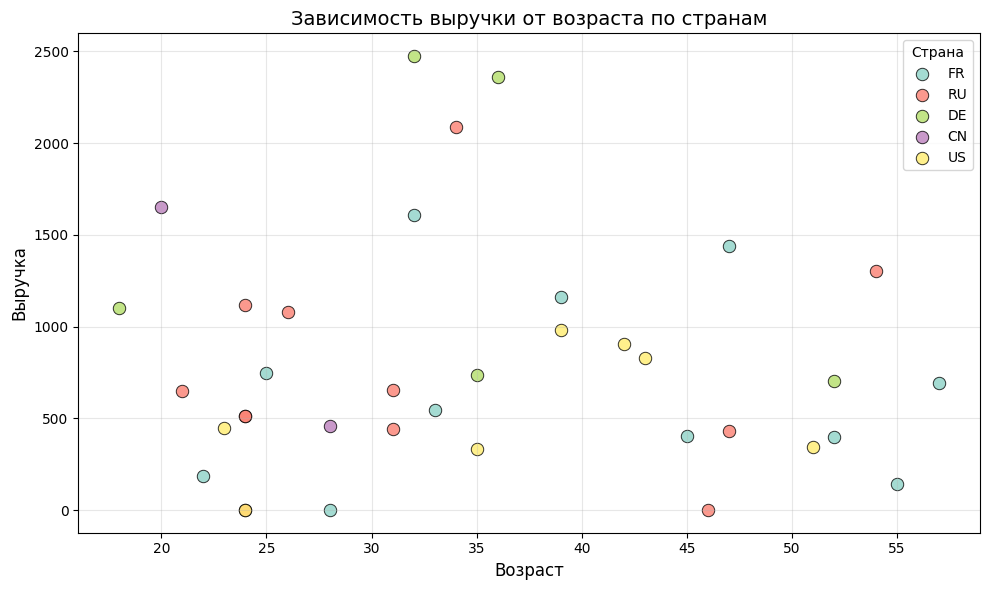

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

# каждую страну укажем выделим определённым цветом
countries = df['country'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(countries)))

for i, country in enumerate(countries):
    # не учитываем выбросы (120-летний пользователь с -1 заказом и 5-летнй ребёнок)
    country_data = df[(df['country'] == country) & (df['age'] < 110) & (df['age'] > 5)]
    ax.scatter(x=country_data['age'], 
               y=country_data['revenue'], 
               c=[colors[i]], 
               label=country, 
               alpha=0.8,
               s=80,
               edgecolor='black', 
               linewidth=0.7)

ax.set_xlabel('Возраст', fontsize=12)
ax.set_ylabel('Выручка', fontsize=12)
ax.set_title('Зависимость выручки от возраста по странам', fontsize=14)
ax.legend(title='Страна')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("figures/revenue_by_age_and_country_scatterplot.png", dpi=300)
plt.show()

Корреляции между возрастом пользователя и выручкой не наблюдается

### Box-plot для выручки с группировкой по странам

C:\Temp\ipykernel_11424\2425711090.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = ax.boxplot(data,


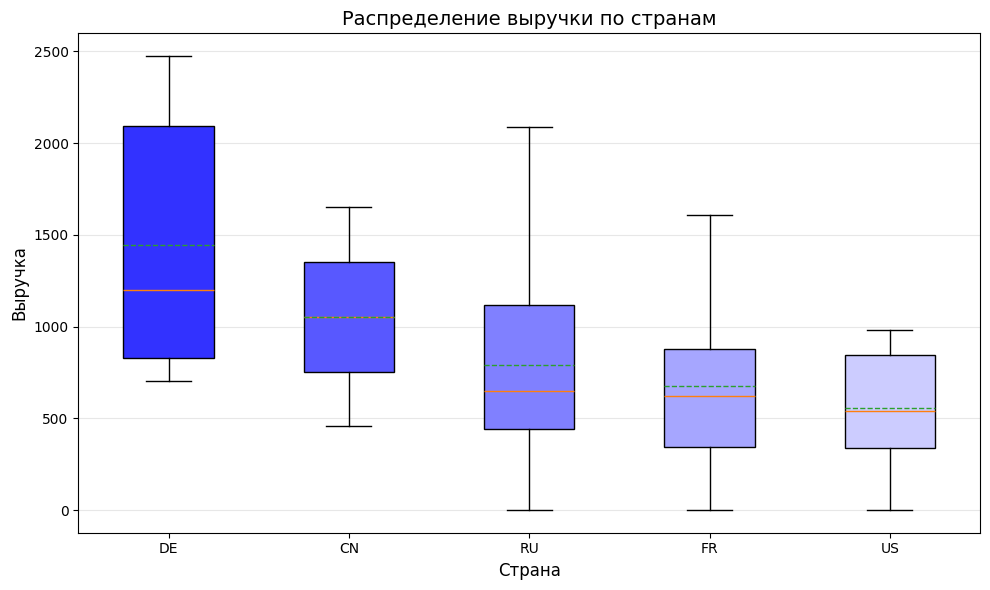

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

# сортировка стран по медианной выручке
country_order = df.groupby('country')['revenue'].median().sort_values(ascending=False).index

# данные в отсортированном по медиане порядке
data = [df[df['country'] == country]['revenue'] for country in country_order]

boxplot = ax.boxplot(data,
                     labels=country_order,
                     patch_artist=True,
                     showmeans=True,
                     meanline=True,
                     showfliers=True)

# цветовая схема
colors = plt.cm.bwr(np.linspace(0.1, 0.4, len(country_order)))
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xlabel('Страна', fontsize=12)
ax.set_ylabel('Выручка', fontsize=12)
ax.set_title('Распределение выручки по странам', fontsize=14)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig("figures/revenue_by_country_boxplot.png", dpi=300)
plt.show()

С помощью данного графика возможно не только визуально сравнить медианные значения выручек, но и оценить степень неоднородности данных по каждой стране, а также выдвигать гипотезы о возможном наличии выбросов